In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

## 定义数据

In [2]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)  #one-hot vectors
mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000038FD908>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000000EC5E6A0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000000EC5E518>)

In [3]:
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)

55000
5000
10000


In [4]:
mnist.train.images.shape   # after flatten

(55000, 784)

In [5]:
mnist.train.labels.shape  #one-hot vectors

(55000, 10)

## 定义模型

In [6]:
# 输入层
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 784], name='input_x')

# 中间层
with tf.name_scope('layer1'):
    W1 = tf.Variable(tf.zeros([784,10]), name='weight')
    tf.summary.histogram('weight', W1)
    b1 = tf.Variable(tf.zeros([10]), name='biases')
    tf.summary.histogram('biases', b1)
    output = tf.nn.softmax(tf.matmul(x, W1) + b1)
    
# loss, cross-entropy function
with tf.name_scope('loss'):
    y = tf.placeholder(tf.float32,[None,10], name='inpyt_y')
#     loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output))
    loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(output), reduction_indices=[1]))
    tf.summary.scalar('loss', loss)

# train
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train_step = optimizer.minimize(loss)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


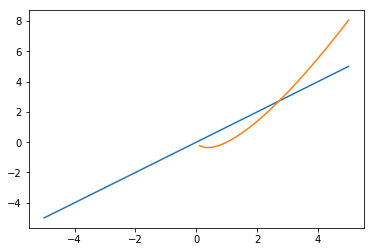

In [13]:
import matplotlib.pyplot as plt
import numpy as np

tx = np.linspace(-5,5,50)
plt.plot(tx,tx)
plt.plot(tx,tx*np.log(tx))
plt.show()

## 模型评估

In [7]:
with tf.name_scope('accuray'):
    correct_prediction = tf.equal(tf.arg_max(output,1), tf.arg_max(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar('accuracy', accuracy)

## 训练

In [8]:
batch_size = 50
n_batch = mnist.train.num_examples // batch_size
epoches = 10

merged = tf.summary.merge_all()
init = tf.global_variables_initializer()

sess = tf.Session()
writer = tf.summary.FileWriter('./tensorboard/board002', sess.graph)
sess.run(init)
summary_i = 0
for i in range(epoches):
    for batch in range(n_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train_step, {x:batch_xs, y:batch_ys})
        if batch%50 == 0:
            summary = sess.run(merged, {x:batch_xs, y:batch_ys})
            writer.add_summary(summary,summary_i)
            summary_i = summary_i + 1
    print("accuracy:", sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))

print("weight:", sess.run(W1),',biases:',sess.run(b1))
print("accuracy:", sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
sess.close()

accuracy: 0.8723
accuracy: 0.8871
accuracy: 0.8947
accuracy: 0.8986
accuracy: 0.9028
accuracy: 0.9052
accuracy: 0.9071
accuracy: 0.9093
accuracy: 0.9101
accuracy: 0.9124
weight: [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] ,biases: [-0.14938217  0.24922365 -0.02351329 -0.11702739  0.05928497  0.46521452
 -0.0325643   0.25180528 -0.61303753 -0.09000216]
accuracy: 0.9124
